In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [2]:
df=pd.read_csv("hypertension_dataset.csv")
df.head(10)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
#Cheking the no. of data in data sets
print(df.shape)

(100000, 9)


In [4]:
#Checking the description of data set
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
#info check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
#Data checking to clean
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
#Checking the unique values
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [8]:
#sorting and changing some float alues to int
print (df['heart_disease'].value_counts())
print (df["gender"].value_counts())

df['age'] = df['age'].astype("int64")

df.sort_values(by=["age","blood_glucose_level"],ascending=True).head()


heart_disease
0    96058
1     3942
Name: count, dtype: int64
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
3742,Male,0,0,0,No Info,12.80,6.6,80,0
5920,Female,0,0,0,No Info,18.39,3.5,80,0
9683,Female,0,0,0,No Info,11.88,5.7,80,0
9733,Male,0,0,0,No Info,25.71,4.8,80,0
11590,Female,0,0,0,No Info,17.15,4.0,80,0


In [9]:
#Checking the iloc on data set
print(df.iloc[0:3,0:12])
print(df[-1:])

   gender  age  hypertension  heart_disease smoking_history    bmi  \
0  Female   80             0              1           never  25.19   
1  Female   54             0              0         No Info  27.32   
2    Male   28             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
       gender  age  hypertension  heart_disease smoking_history    bmi  \
99999  Female   57             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
99999          6.6                   90         0  


In [10]:
#Changing gender to "Male" as 1, "Female" as 2, "Other"as 3
d = {"Male" : 1, "Female" : 2, "Other" : 3}
df=df.replace({"gender":d})
df.head()

C:\Users\Deepanshu221\AppData\Local\Temp\ipykernel_4596\3816479520.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({"gender":d})


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80,0,1,never,25.19,6.6,140,0
1,2,54,0,0,No Info,27.32,6.6,80,0
2,1,28,0,0,never,27.32,5.7,158,0
3,2,36,0,0,current,23.45,5.0,155,0
4,1,76,1,1,current,20.14,4.8,155,0


In [11]:
#using replace command to change text to int
f = {"No Info" : 1, "never" : 2, "former" : 3, "current" : 4, "not current" : 5, "ever" : 6}
df=df.replace(f)
df.head()

C:\Users\Deepanshu221\AppData\Local\Temp\ipykernel_4596\1922218567.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(f)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80,0,1,2,25.19,6.6,140,0
1,2,54,0,0,1,27.32,6.6,80,0
2,1,28,0,0,2,27.32,5.7,158,0
3,2,36,0,0,4,23.45,5.0,155,0
4,1,76,1,1,4,20.14,4.8,155,0


In [12]:
df['hypertension'].value_counts()


hypertension
0    92515
1     7485
Name: count, dtype: int64

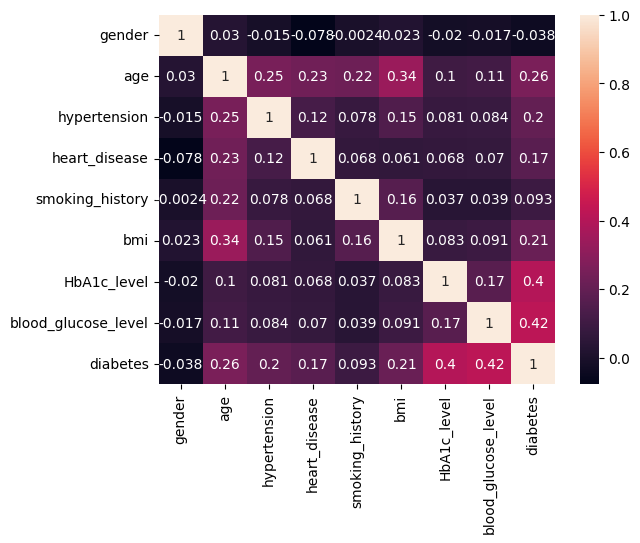

In [13]:
#Create a heat map
ax = sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: xlabel='hypertension', ylabel='count'>

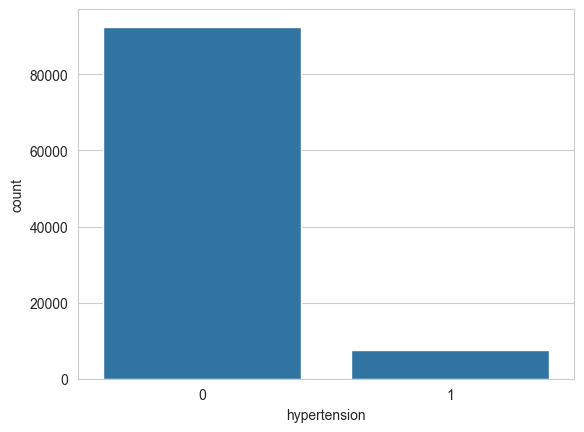

In [14]:
#Setting grid and countplot in diabetes
sns.set_style('whitegrid')
sns.countplot(x = 'hypertension', data=df)


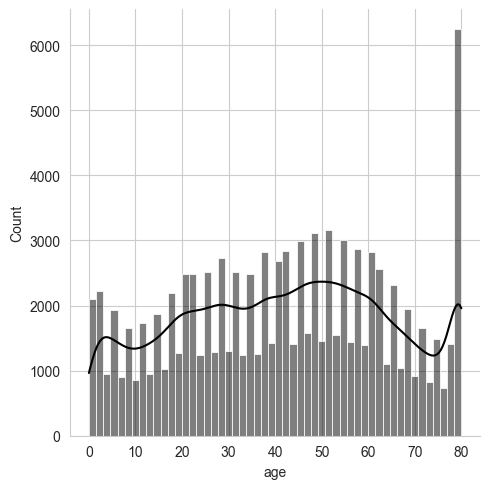

In [15]:
sns.displot(df['age'], kde=True,color="black")


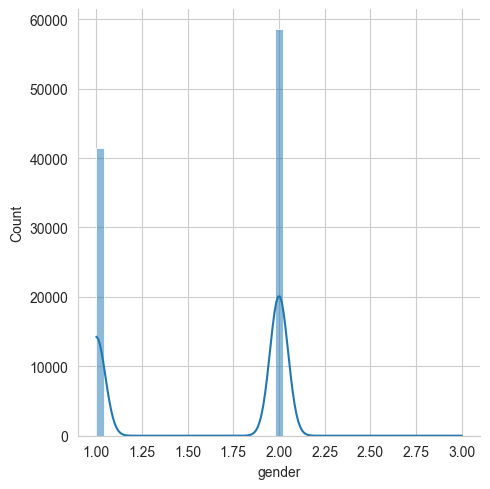

In [16]:
sns.displot(df['gender'], kde=True)


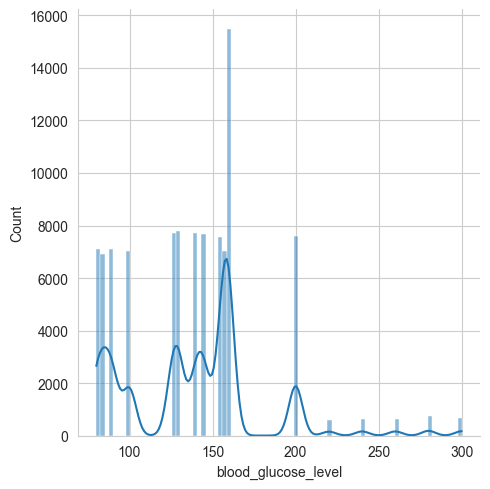

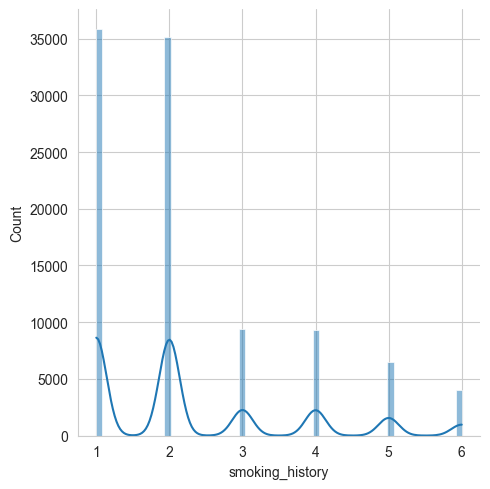

In [17]:
sns.displot(df['blood_glucose_level'], kde=True)
sns.displot(df['smoking_history'], kde=True)

Text(0.5, 1.0, 'Outliner Identification')

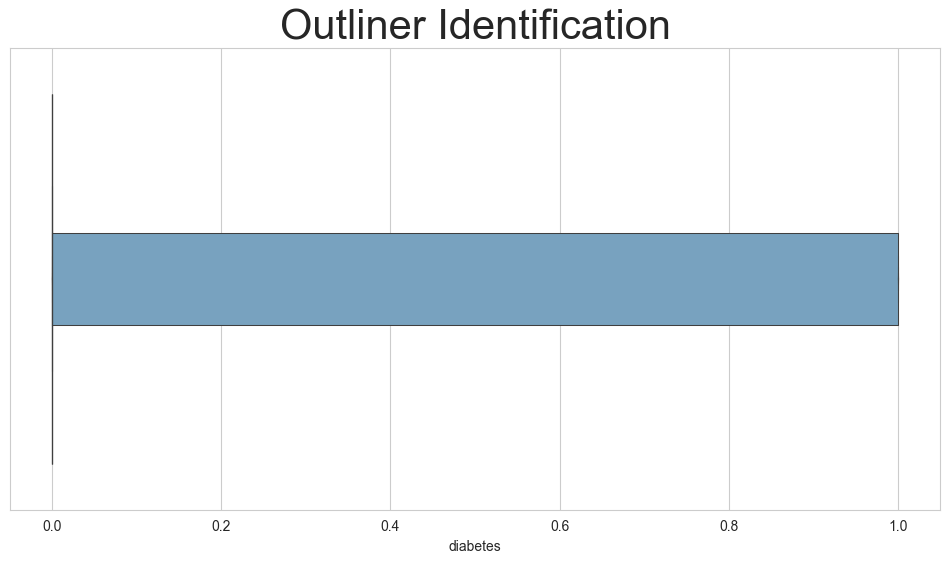

In [18]:
#Showing the outliners
plt.figure(figsize=(12,6))
sns.boxenplot(x=df['diabetes'])
plt.title("Outliner Identification", fontsize = 30)

In [19]:
#Training the model using logistic regerssion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Setting x with the main parameter and y with the features
y = df[['gender', 'age', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']]
x = df [['hypertension']]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,stratify=x,random_state=101)


In [21]:
#Setting model
model = LogisticRegression(max_iter=10000000)
#fitting the model
model.fit(y_train,x_train)

c:\Users\Deepanshu221\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000000)

In [27]:
#predicting with test data(validation)
x_pred=model.predict(y_test)



[0 0 0 ... 0 0 0]


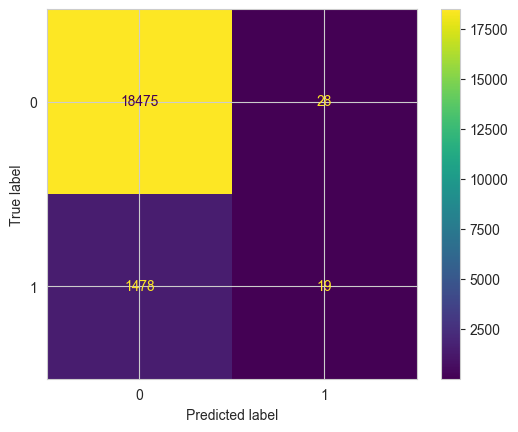

In [23]:
#plotiong a confusion matrix b/w x_pred and x_test
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(x_test,x_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [24]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(x_test,x_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18503
           1       0.40      0.01      0.02      1497

    accuracy                           0.92     20000
   macro avg       0.67      0.51      0.49     20000
weighted avg       0.89      0.92      0.89     20000



In [25]:
#Showing report
print ("LogisticRegression : ", classification_report(x_test,x_pred))


LogisticRegression :                precision    recall  f1-score   support

           0       0.93      1.00      0.96     18503
           1       0.40      0.01      0.02      1497

    accuracy                           0.92     20000
   macro avg       0.67      0.51      0.49     20000
weighted avg       0.89      0.92      0.89     20000



In [26]:
#Checking accuracy
from sklearn.metrics import accuracy_score
print("Logistric Regression model accuracy is",accuracy_score(x_test,x_pred)*100,"%")


Logistric Regression model accuracy is 92.47 %
